In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import neuropythy as ny
import ipyvolume as ipv
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Betas

In [10]:
sub = ny.freesurfer_subject('F:\\ds003812-download\\derivatives\\freesurfer\\wlsubj001')
betas = np.load("F:\\ds003812-download\\derivatives\\processed\\betas\\betas_sub-wlsubj001_ses-04_task-sfprescaled_results.mat.npy")
# betas_freq = betas[0]
# colores_normalizados = (betas_freq - np.min(betas_freq)) / (np.max(betas_freq) - np.min(betas_freq))
# colores_rgba = plt.cm.viridis(betas_freq)

# fig = ipv.figure()

# ny.cortex_plot(sub.lh, surface='pial', figure=fig, color=colores_rgba[0:sub.lh.vertex_count])
# ny.cortex_plot(sub.rh, surface='pial', figure=fig, color=colores_rgba[sub.lh.vertex_count:])

# ipv.show()

# ny.cortex_plot(sub.lh, surface='inflated', color=colores_rgba[0:sub.lh.vertex_count])


# Smoothed Betas

In [11]:
smoothed_betas = np.load("F:\\ds003812-download\\derivatives\\processed\\betas\\smoothed_betas_sub-wlsubj001_ses-04_task-sfprescaled_results.mat.npy")

# colores_rgba = plt.cm.viridis(smoothed_betas[0])

# fig = ipv.figure()

# ny.cortex_plot(sub.lh, surface='pial', figure=fig, color=colores_rgba[0:sub.lh.vertex_count])
# ny.cortex_plot(sub.rh, surface='pial', figure=fig, color=colores_rgba[sub.lh.vertex_count:])

# ipv.show()

# ny.cortex_plot(sub.lh, surface='inflated', color=colores_rgba[0:sub.lh.vertex_count])


# Size pRF

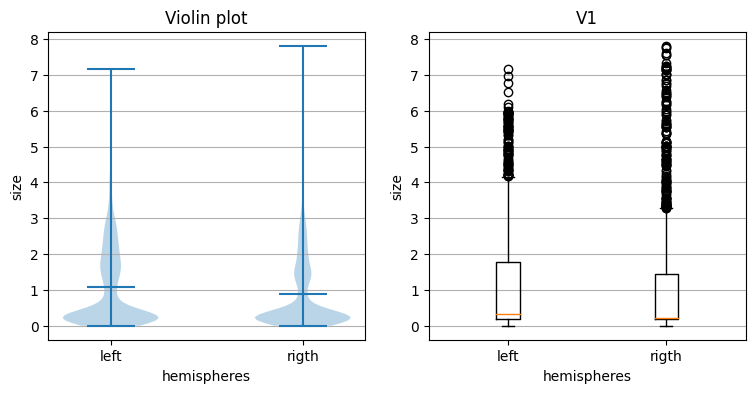

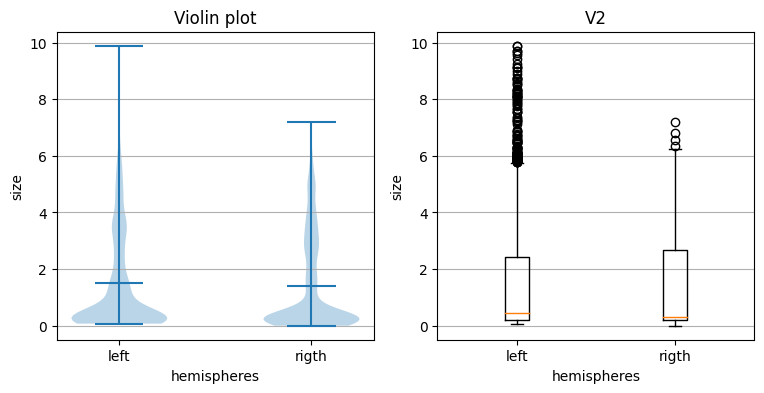

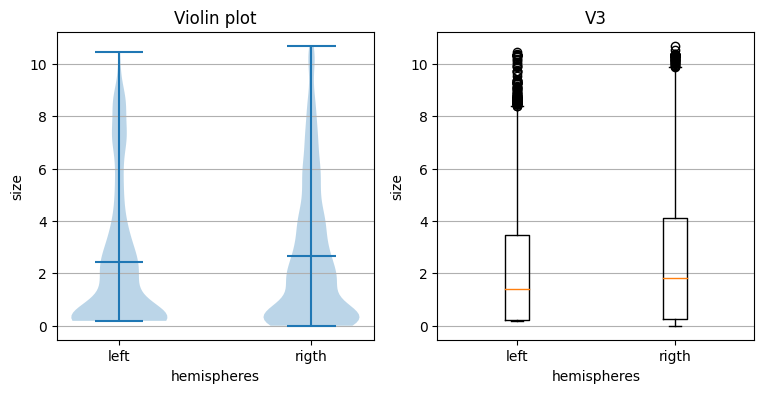

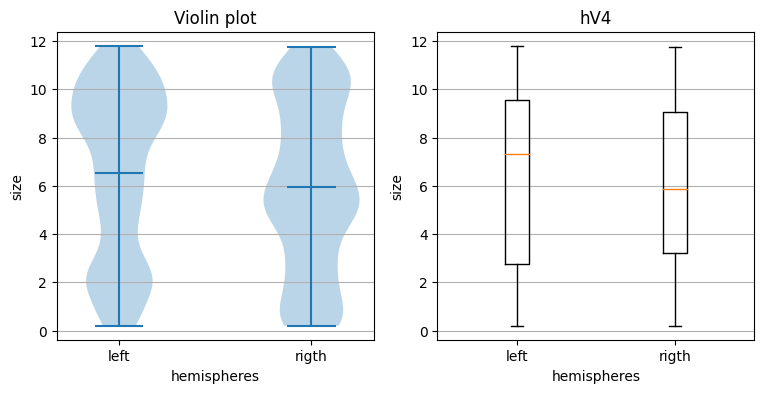

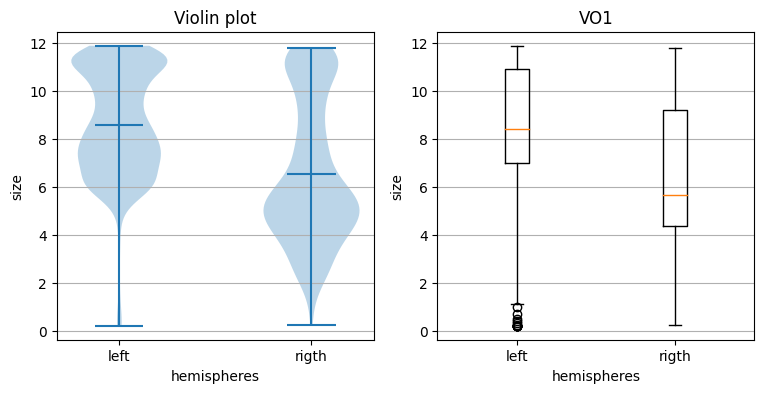

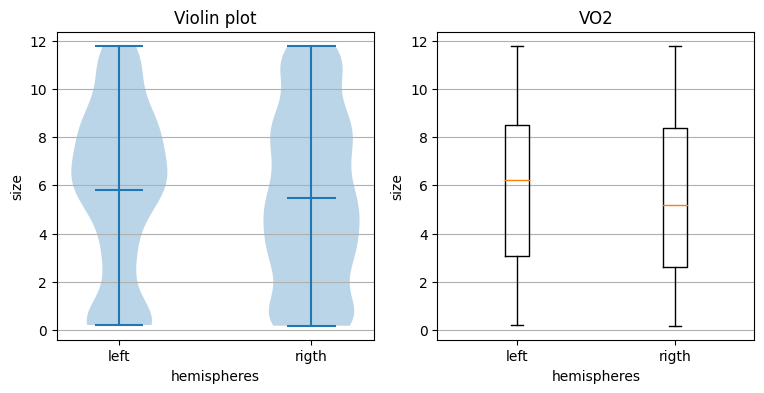

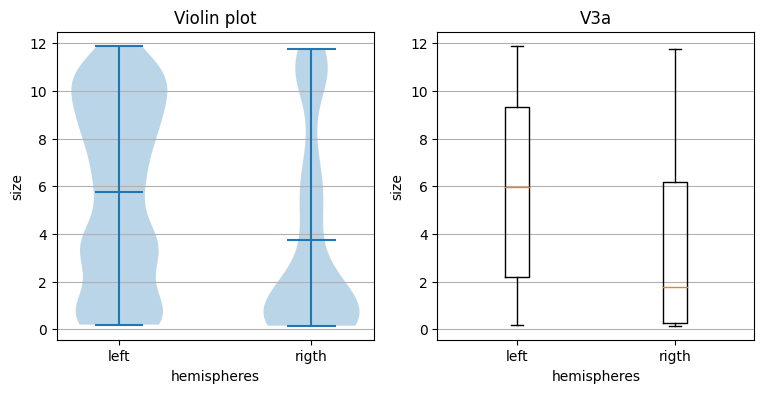

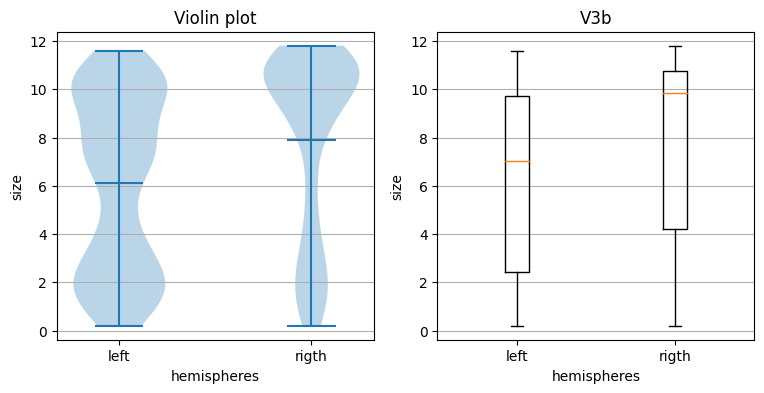

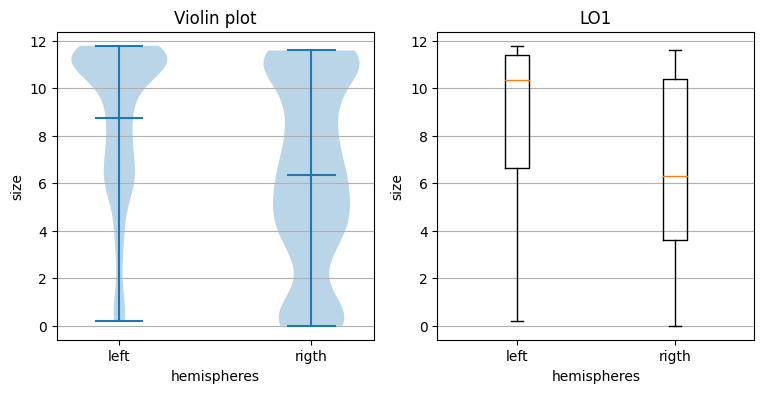

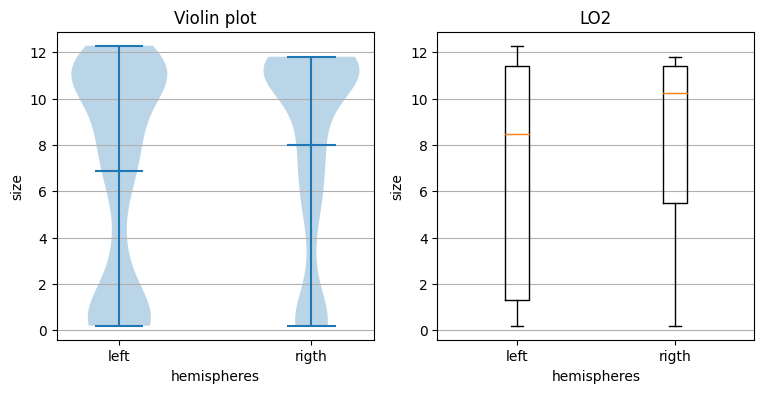

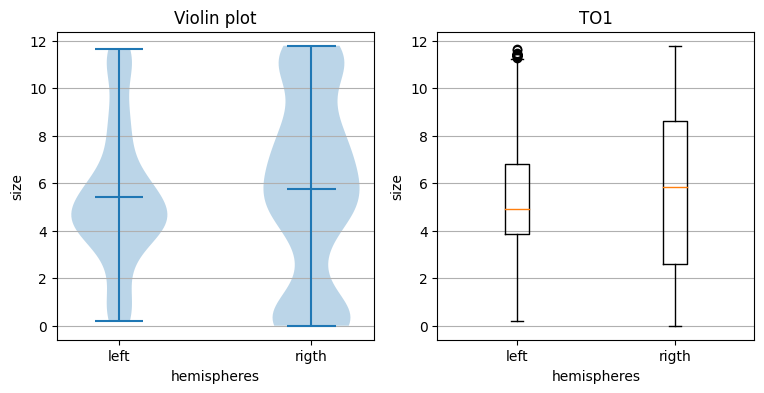

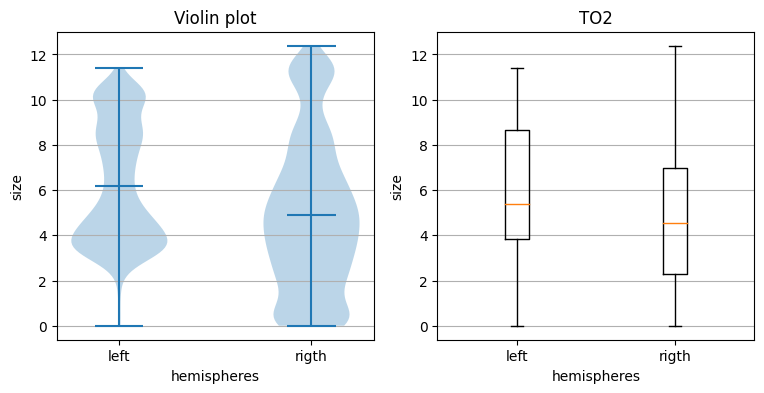

In [8]:
df_1 = pd.read_csv("C:\\Users\\Marie\\Documents\\thesis\\broderick\\table_size_prf.csv")
df_2 = pd.read_csv("C:\\Users\\Marie\\Documents\\thesis\\broderick\\table_size_prf_benson14.csv")
df_3 = pd.read_csv("C:\\Users\\Marie\\Documents\\thesis\\broderick\\table_size_prf_data_full.csv")
df_4 = pd.read_csv("C:\\Users\\Marie\\Documents\\thesis\\broderick\\table_size_prf_data_full_inferred_varea.csv")

dfs = [df_1,df_2,df_3,df_4]

rois = ['V1','V2','V3','hV4','VO1','VO2','V3a','V3b','LO1','LO2','TO1','TO2']

isub = 1
index_df =2

for index_roi in range(1,13):
    
    current_df_0 = dfs[index_df][(dfs[index_df]['subj']==isub) & (dfs[index_df]['roi']==index_roi) & (dfs[index_df]['side']==0)]
    current_df_1 = dfs[index_df][(dfs[index_df]['subj']==isub) & (dfs[index_df]['roi']==index_roi) & (dfs[index_df]['side']==1)]

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

    all_data = [current_df_0['size'],current_df_1['size']]  

    axs[0].violinplot(all_data,
                      showmeans=True,
                      showmedians=False)
    axs[0].set_title('Violin plot')

    # plot box plot
    axs[1].boxplot(all_data)
    axs[1].set_title(f'{rois[index_roi-1]}')

    # adding horizontal grid lines
    for ax in axs:
        ax.yaxis.grid(True)
        ax.set_xticks([y + 1 for y in range(len(all_data))],
                      labels=['left', 'rigth'])
        ax.set_xlabel('hemispheres')
        ax.set_ylabel('size')

    plt.show()



# Frequency

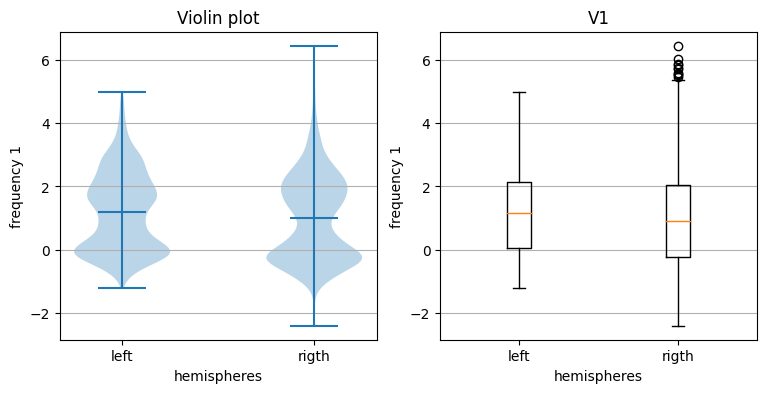

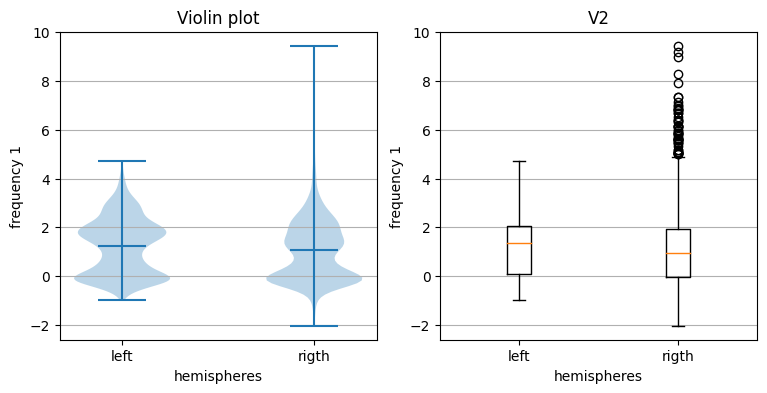

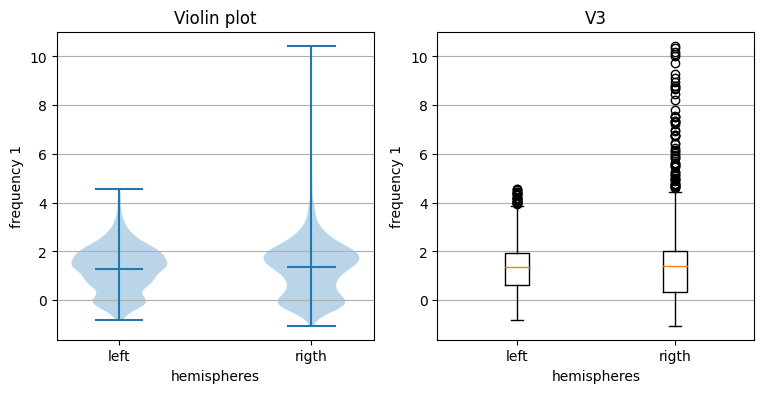

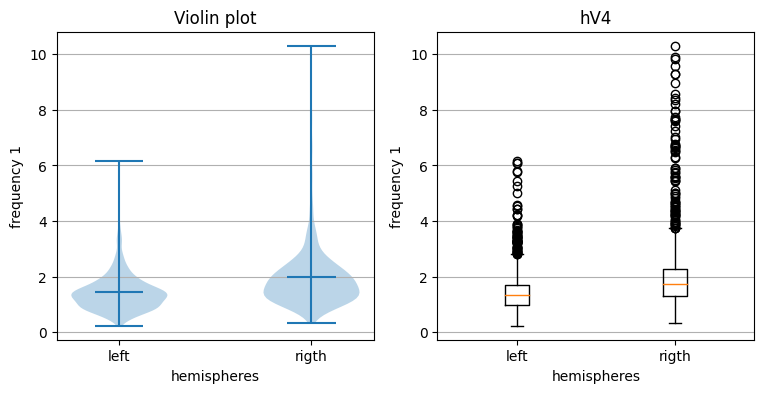

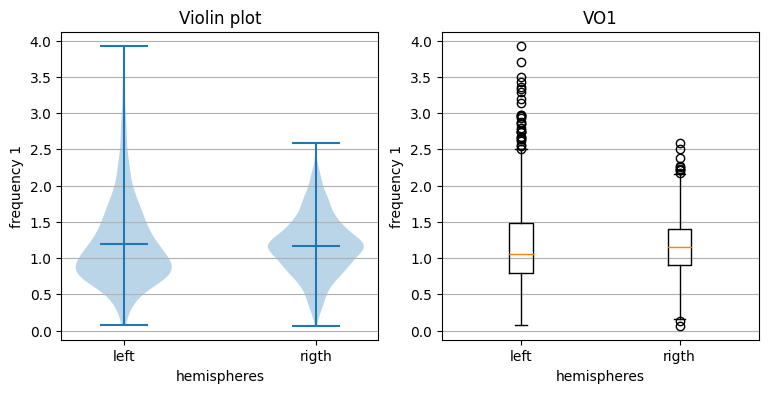

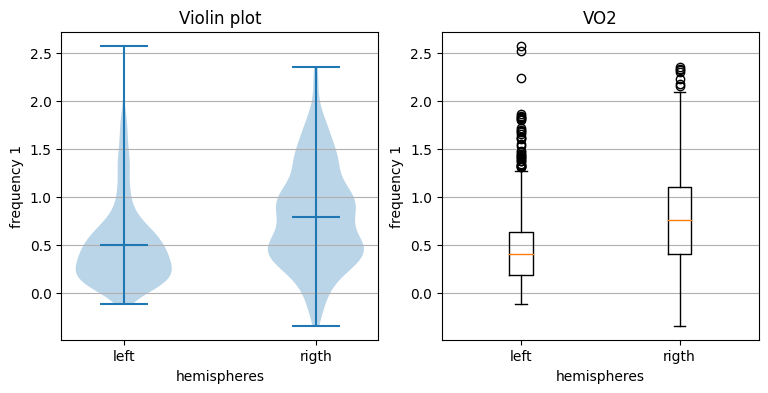

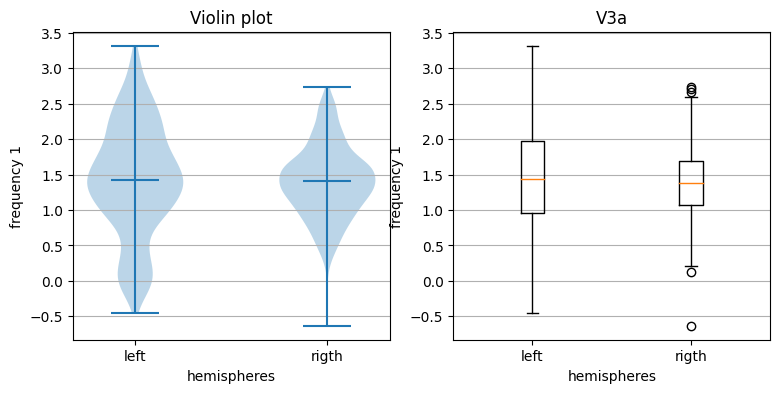

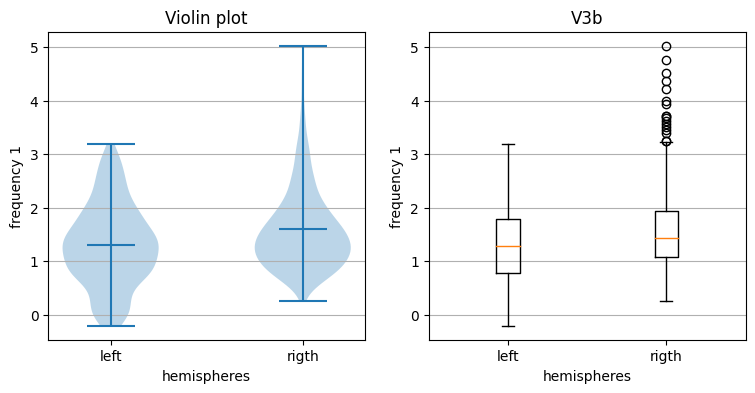

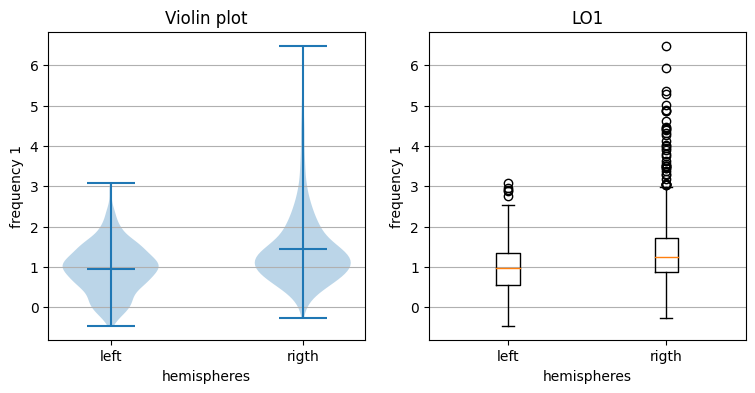

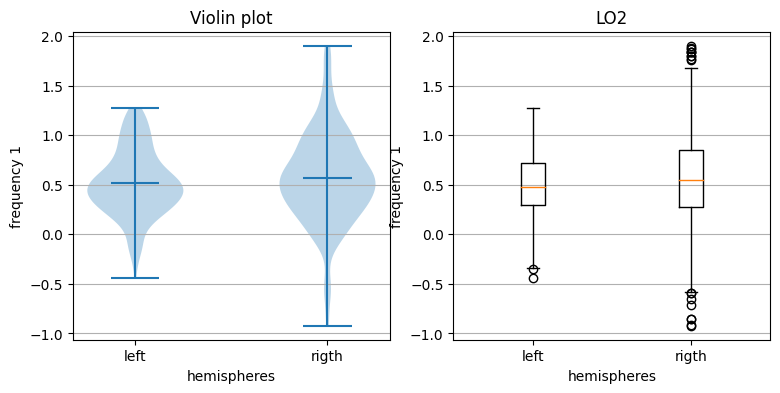

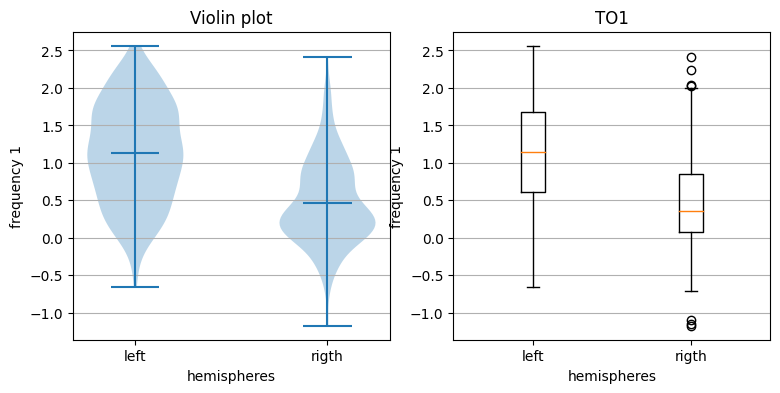

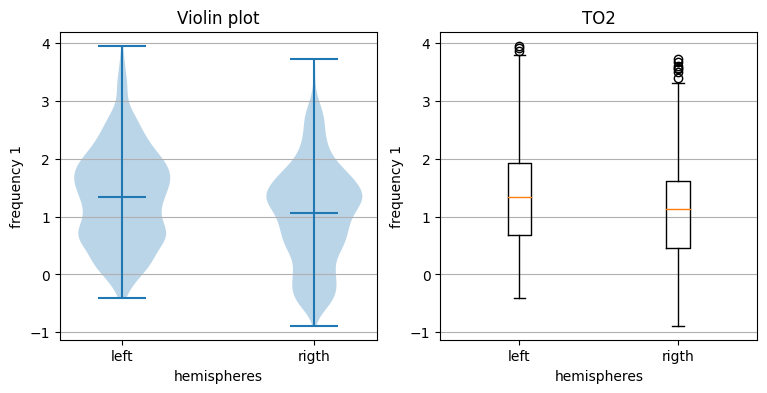

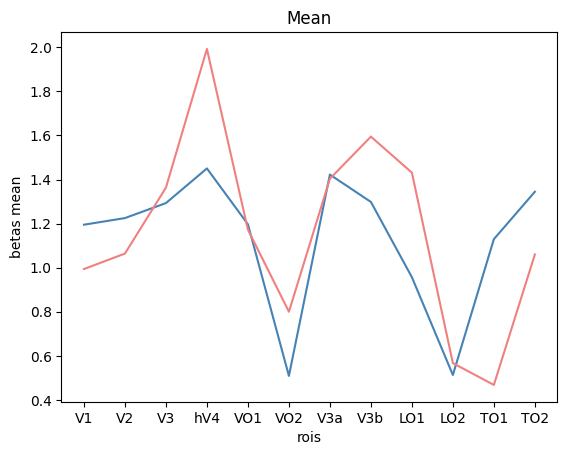

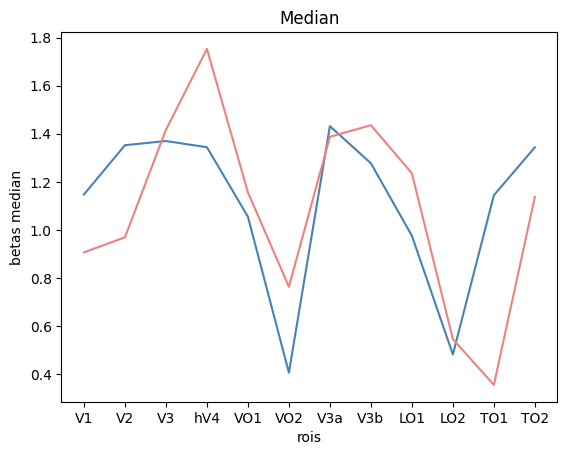

In [16]:
freq = 0
rois = ['V1','V2','V3','hV4','VO1','VO2','V3a','V3b','LO1','LO2','TO1','TO2']

rois_data = np.load("F:\\ds003812-download\\derivatives\\prf_solutions\\all\\sub-wlsubj001_inferred_varea.npy", allow_pickle=True)

betasL = smoothed_betas[freq][0:sub.lh.vertex_count]
betasR = smoothed_betas[freq][sub.lh.vertex_count:]   

mean_betasL = []
mean_betasR = []

median_betasL = []
median_betasR = []

for index_roi in range(1,13):
    idx_left = np.where(rois_data[0]==index_roi)
    idx_rigth= np.where(rois_data[1]==index_roi)

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    
    mean_betasL.append(np.mean(betasL[idx_left]))
    mean_betasR.append(np.mean(betasR[idx_rigth]))

    median_betasL.append(np.median(betasL[idx_left]))
    median_betasR.append(np.median(betasR[idx_rigth]))

    all_data = [betaL[idx_left],betasR[idx_rigth]]  
    
    axs[0].violinplot(all_data,
                      showmeans=True,
                      showmedians=False)
    axs[0].set_title('Violin plot')
    # plot box plot
    axs[1].boxplot(all_data)
    axs[1].set_title(f'{rois[index_roi-1]}')
    # adding horizontal grid lines
    for ax in axs:
        ax.yaxis.grid(True)
        ax.set_xticks([y + 1 for y in range(len(all_data))],
                      labels=['left', 'rigth'])
        ax.set_xlabel('hemispheres')
        ax.set_ylabel(f'frequency {freq + 1}')
    plt.show()

plt.plot(rois,mean_betasL,color='steelblue')
plt.plot(rois,mean_betasR, color='lightcoral')
plt.xlabel('rois')
plt.ylabel('betas mean')
plt.title("Mean")
plt.show()

plt.plot(rois,median_betasL,color='steelblue')
plt.plot(rois,median_betasR, color='lightcoral')
plt.xlabel('rois')
plt.ylabel('betas median')
plt.title("Median")
plt.show()

[2.6507908820414032, 2.550028316395005, 2.381744687979421, 2.780072992063712, 2.767636354278407, 2.3989089587379246, 2.4566159142109285, 2.520822675823002, 2.3809521737102477, 2.497027429094532, 2.5285830551798836, 2.6234751061578705, 2.724631147474426, 2.7727266066496323, 3.1126073290257117, 3.213397737939108, 2.161808262261149, 2.2717668125099526, 2.5578099480862386, 2.848755882123213, 3.2461348042815072, 3.252049069506994, 3.529353010766313, 3.527172777312689, 2.1626836577367183, 2.2379052363311507, 3.122036039261559, 3.2143320925383128, 3.4209479678141, 3.484588797714993, 3.6753479344461493, 4.344082910662928, 2.3936097420578797, 2.774123112577759, 3.3970493546155027, 3.556997122057402, 3.834044115277773, 4.020359141388678, 4.72800383037496, 5.978796340093876, 6.614700279318357, 2.198385067579455, 2.3912723176128994, 3.676907904253034, 3.8254761376162567, 4.176088251056247, 5.006544502227208, 7.887784309621677, 10.45508412972064, 8.287834834936206, 3.920709689872904, 4.685198394853

TypeError: list indices must be integers or slices, not tuple

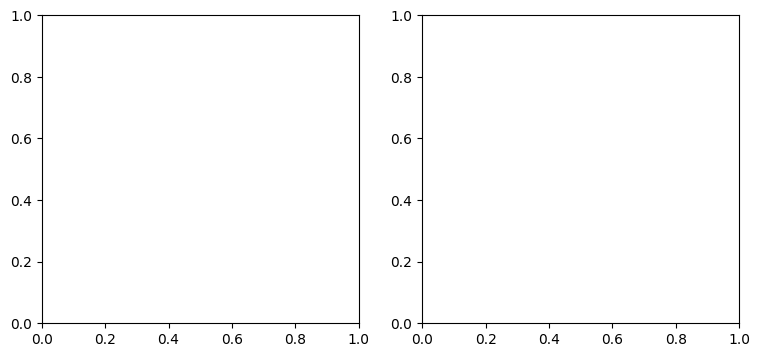

In [22]:
ecc =np.load("F:\\ds003812-download\\derivatives\\prf_solutions\\all\\sub-wlsubj001_full-eccen.npy", allow_pickle=True)
w_a = 6
psf_l = [w_a/elem if elem > 10**(-8) else 0 for elem in ecc[0]]
psf_r = [w_a/elem if elem > 10**(-8) else 0 for elem in ecc[1]]

print(psf_l)

for index_roi in range(1,13):
    idx_left = np.where(rois_data[0]==index_roi)
    idx_rigth= np.where(rois_data[1]==index_roi)

    print(idx_left)

    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
    
    # mean_betasL.append(np.mean(betasL[idx_left]))
    # mean_betasR.append(np.mean(betasR[idx_rigth]))

    # median_betasL.append(np.median(betasL[idx_left]))
    # median_betasR.append(np.median(betasR[idx_rigth]))

    all_data = [psf_l[idx_left],psf_r[idx_rigth]]  
    
    axs[0].violinplot(all_data,
                      showmeans=True,
                      showmedians=False)
    axs[0].set_title('Violin plot')
    # plot box plot
    axs[1].boxplot(all_data)
    axs[1].set_title(f'{rois[index_roi-1]}')
    # adding horizontal grid lines
    for ax in axs:
        ax.yaxis.grid(True)
        ax.set_xticks([y + 1 for y in range(len(all_data))],
                      labels=['left', 'rigth'])
        ax.set_xlabel('hemispheres')
        ax.set_ylabel(f'psf {freq + 1}')
    plt.show()

